In [1]:
import os
import sys
sys.path.append('/Volumes/matsui-k/projects/blind_deconv')

from core import blind_utils
reload(blind_utils)
blind_utils.proj_path = '/Volumes/matsui-k/projects/blind_deconv'

from pprint import pprint

import glob

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

Couldn't import dot_parser, loading of dot files will not be possible.
using cpu
theano.config.floatX float64
using cpu
theano.config.floatX float64


In [86]:
list_model = glob.glob('../simulation/b3000_gauss_15_1272_snr20/trained_models/*')
pprint(list_model)

['../simulation/b3000_gauss_15_1272_snr20/trained_models/lmax8reg1',
 '../simulation/b3000_gauss_15_1272_snr20/trained_models/lmax8reg10',
 '../simulation/b3000_gauss_15_1272_snr20/trained_models/ThreeLayer_8_8_8_relu_relu_relu_bias0.0_wdl0.0_adam_0.001_1.0_',
 '../simulation/b3000_gauss_15_1272_snr20/trained_models/LinearCombination_8_nlayer0_jin8_jout8_actNone_bias0.0_wdl0.0_adam_0.001_1.0_',
 '../simulation/b3000_gauss_15_1272_snr20/trained_models/MultiLayer_8_nlayer2_jin8_jout8_actrelu_bias0.0_wdl0.0_adam_0.001_1.0_',
 '../simulation/b3000_gauss_15_1272_snr20/trained_models/MultiLayer_8_nlayer3_jin8_jout8_actrelu_bias0.0_wdl0.0_adam_0.001_1.0_',
 '../simulation/b3000_gauss_15_1272_snr20/trained_models/MultiLayer_8_nlayer4_jin8_jout8_actrelu_bias0.0_wdl0.0_adam_0.001_1.0_',
 '../simulation/b3000_gauss_15_1272_snr20/trained_models/MultiLayer_8_nlayer6_jin8_jout8_actrelu_bias0.0_wdl0.0_adam_0.001_1.0_',
 '../simulation/b3000_gauss_15_1272_snr20/trained_models/MultiLayer_8_nlayer8_jin8

In [67]:
list_simulation_dir = ['b3000_gauss_15_1272_snr20', 'b3000_gaussian_snr20_dw30', 'b3000_gaussian_snr20_dw90']

In [4]:
list_model = glob.glob('../simulation/*')
pprint(list_model)

['../simulation/b3000_gaussian_novi_snr50',
 '../simulation/b3000_gaussian_snr20_dw30',
 '../simulation/b3000_gaussian_snr20_dw90',
 '../simulation/b3000_gaussian_snr50_noweighting',
 '../simulation/b3000_gauss_15_1272_snr20',
 '../simulation/multishell_data_save_test',
 '../simulation/multishell_test',
 '../simulation/multishell_test_along_axes']


In [106]:
def get_value(simulation_dir, model_name, angle_list, measure_name):
    df = blind_utils.df_over_angles(simulation_dir, model_name
                                                    , rotated=True)
    if  measure_name == 'bias1_all':
            array_plot = (df.loc[angle_list, ['bias1_all']].values.flatten() + df.loc[angle_list, ['bias2_all']].values.flatten()) / 2
    elif  measure_name == 'std1_all':
         array_plot = (df.loc[angle_list, ['std1_all']].values.flatten() + df.loc[angle_list, ['std2_all']].values.flatten()) / 2
    else:
        array_plot = df.loc[angle_list, [measure_name]].values.flatten()
    return array_plot

In [108]:
get_value(list_simulation_dir[0], list_model[0], ['20', '40', '90'], 'bias1_all')

array([ 4.74832594,  4.19746358,  0.17987778])

In [98]:
df.loc[['20', '40'], ['std1_all']].values.flatten()

array([ 15.45208699,  22.47995595])

In [55]:
def plot_over_angle(simulation_dir_name, measure_name, list_model_key=None, list_except_model_key = None):
    simulation_dir_name = os.path.basename(os.path.normpath(simulation_dir_name))
    list_model = glob.glob('../simulation/{}/trained_models/*'.format(simulation_dir_name))
    
    if list_model_key is None:
        list_model_key = ['']
    if list_except_model_key is None:
        list_except_model_key = ['']
        
    list_selected_model = []
    for m in list_model:
        for model_key in list_model_key:
            if model_key in m:
                list_selected_model.append(m)
                break
    for except_key in list_except_model_key:
        list_selected_model = sorted([model for model in list_selected_model if except_key not in model])
    
    if all(['lmax' in model for model in list_selected_model]):
        list_selected_model = sorted(list_selected_model, key=lambda name: float(name.split('reg')[1]))
        
        
    for model in list_selected_model:
        try:
            df = blind_utils.df_over_angles(simulation_dir_name, model, rotated=True)
        except IOError as e:
            print e
            continue
            
        if df is None:
            continue
            
        if measure_name not in df.keys():
            print 'ERROR: INVALID MEASURE_NAME : {}'.format(measure_name)
            print 'valid keys'
            pprint( df.keys())
            return
        
        if  measure_name == 'bias1_all':
            array_plot = (df.loc[:, ['bias1_all']].values.flatten() + df.loc[:, ['bias2_all']].values.flatten()) / 2
        elif  measure_name == 'std1':
            array_plot = (df.loc[:, ['std1_all']].values.flatten() + df.loc[:, ['std2_all']].values.flatten()) / 2
        else:
            array_plot = df.loc[:, [measure_name]].values.flatten()
        plt.plot( np.arange(20, 91, 10), array_plot, label=os.path.basename(os.path.normpath(model)))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.ylabel(measure_name, fontsize=16)

In [ ]:
def plot_over_simulation(measure_name, list_model_key=None, list_except_model_key = None):
    
    if list_model_key is None:
        list_model_key = ['']
    if list_except_model_key is None:
        list_except_model_key = ['']
        
    list_selected_model = []
    for m in list_model:
        for model_key in list_model_key:
            if model_key in m:
                list_selected_model.append(m)
                break
    for except_key in list_except_model_key:
        list_selected_model = sorted([model for model in list_selected_model if except_key not in model])
    
    if all(['lmax' in model for model in list_selected_model]):
        list_selected_model = sorted(list_selected_model, key=lambda name: float(name.split('reg')[1]))
        
        
    for model in list_selected_model:
        try:
            df = blind_utils.df_over_angles(simulation_dir_name, model, rotated=True)
        except IOError as e:
            print e
            continue
            
        if df is None:
            continue
            
        if measure_name not in df.keys():
            print 'ERROR: INVALID MEASURE_NAME : {}'.format(measure_name)
            print 'valid keys'
            pprint( df.keys())
            return
        
        if  measure_name == 'bias1_all':
            array_plot = (df.loc[:, ['bias1_all']].values.flatten() + df.loc[:, ['bias2_all']].values.flatten()) / 2
        elif  measure_name == 'std1':
            array_plot = (df.loc[:, ['std1_all']].values.flatten() + df.loc[:, ['std2_all']].values.flatten()) / 2
        else:
            array_plot = df.loc[:, [measure_name]].values.flatten()
        plt.plot( np.arange(20, 91, 10), array_plot, label=os.path.basename(os.path.normpath(model)))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.ylabel(measure_name, fontsize=16)

In [56]:
keys = [u'angle_tolerance', u'bias1', u'bias1_all', u'bias2', u'bias2_all',
       u'biases_tol1', u'biases_tol2', u'n_spurious_peaks', u'std1',
       u'std1_all', u'std2', u'std2_all', u'stds_tol1', u'stds_tol2',
       u'success_rate', u'success_rate_tol']

In [57]:
list_major_measure = [u'bias1_all', u'std1_all', u'n_spurious_peaks' ,u'success_rate_tol']

In [84]:
def show_major_measures(simulation_dir, list_include, list_exclude):
    plt.figure(figsize=(4,12))
    plt.suptitle(simulation_dir)
    for i, measure in enumerate( list_major_measure):
        plt.subplot(410+i+1)
        plot_over_angle(simulation_dir, measure, list_include, list_exclude)

b3000_gauss_15_1272_snr20
b3000_gaussian_snr20_dw30
b3000_gaussian_snr20_dw90


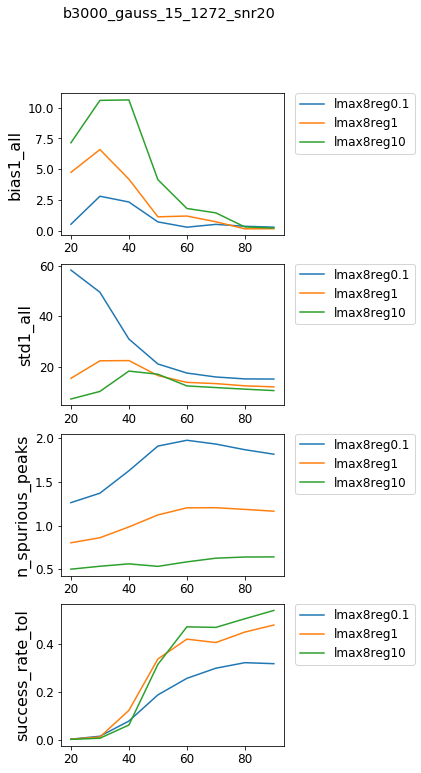

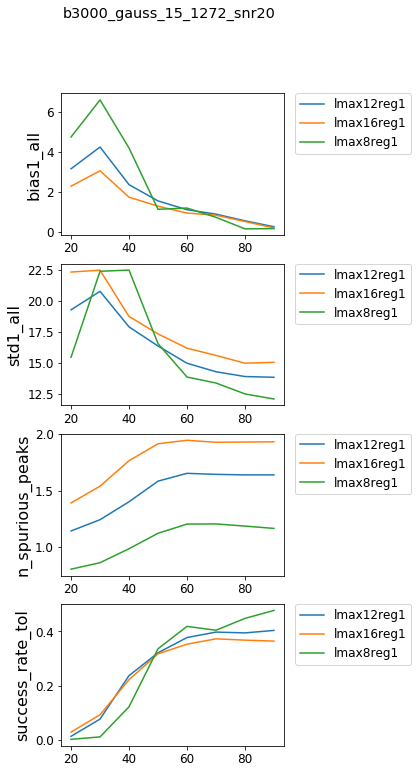

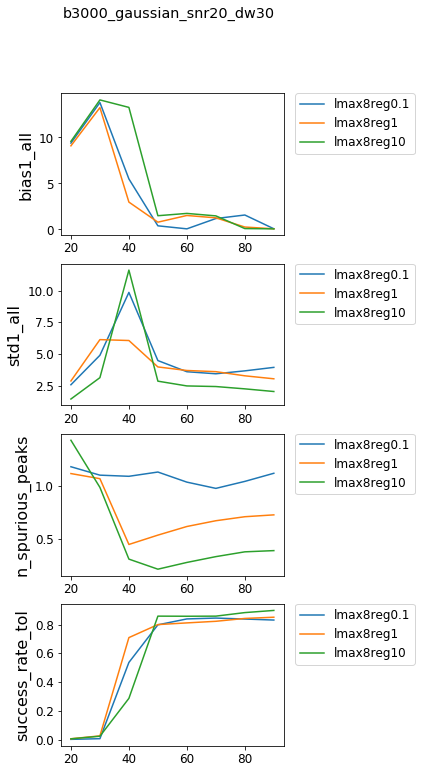

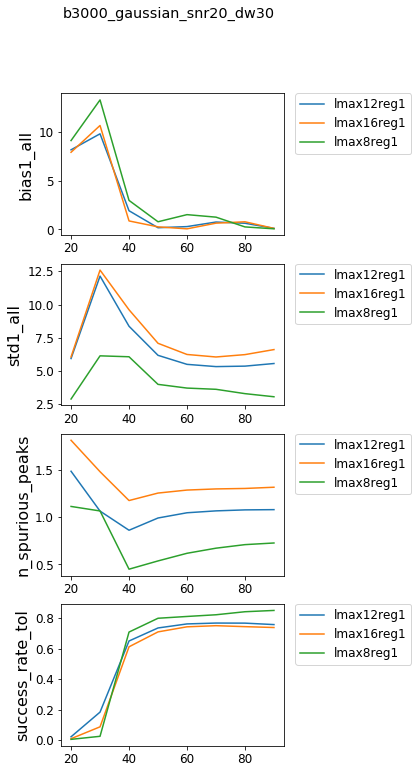

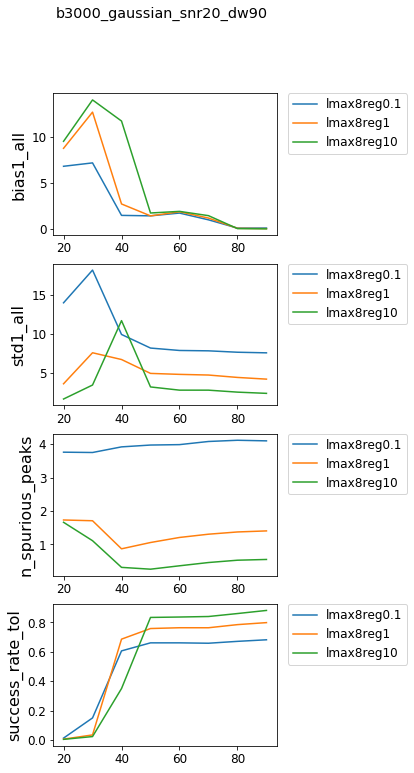

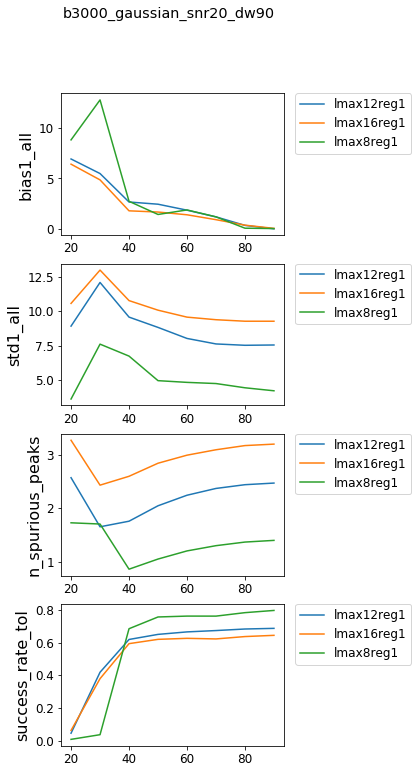

In [85]:
for simulation_dir in list_simulation_dir:
    print(simulation_dir)
    show_major_measures(simulation_dir, list_include=['lmax8'], list_exclude=[])
    show_major_measures(simulation_dir, list_include=['reg1'], list_exclude=['reg10'])    


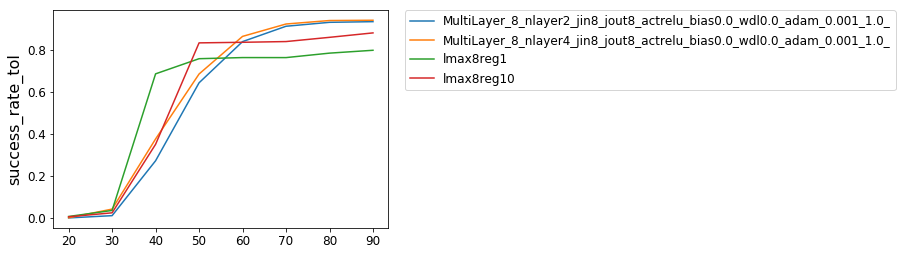

In [50]:
plot_over_simulation('b3000_gaussian_snr20_dw90', 'success_rate_tol', ['lmax8', 'nlayer'], ['nlayer0', 'yer3', 'r6', 'r8', 'reg0.1'])

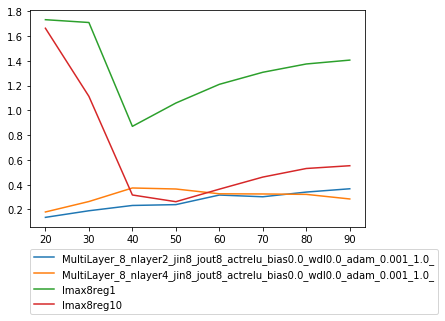

In [112]:
plot_over_simulation('b3000_gaussian_snr20_dw90', 'n_spurious_peaks', ['lmax8', 'nlayer'], ['nlayer0', 'yer3', 'r6', 'r8', 'reg0.1'])

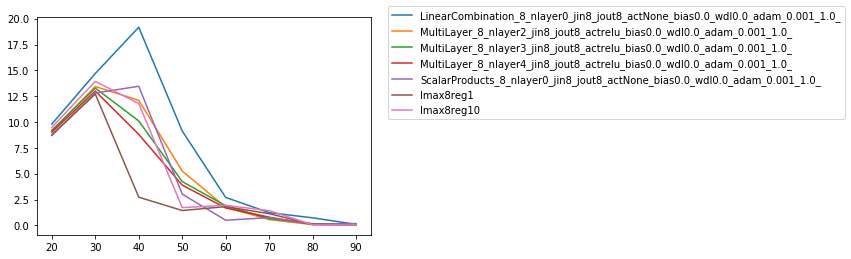

In [75]:
plot_over_simulation('b3000_gaussian_snr20_dw90', 'bias2_all', ['lmax8', 'nlayer'], [ 'r6', 'r8', 'reg0.1'])

In [73]:
plot_over_simulation('nlayer')

TypeError: plot_over_simulation() takes at least 2 arguments (1 given)

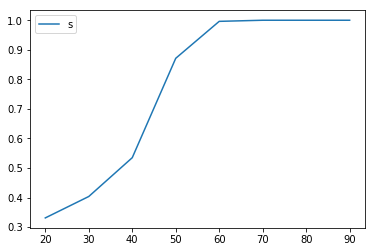

In [5]:
plt.plot( np.arange(20, 91, 10), df.loc[:, ['success_rate']].values.flatten(), label='s')
plt.legend()

In [18]:
'' in 'a'

True

In [25]:
'bias1' in df.keys()

True

In [12]:
'bias1'[:1]

'b'